In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
import itertools
import string

In [2]:
# plt.style.use('ggplot')
sns.set(style='white')
# plt.style.use('default')
COLOR = 'black'
rcParams['font.family'] = 'Arial'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['xtick.color'] = COLOR

O período analisado é 2014 a 2022 (numa sequência numérica o último valor é ignorado, por isso coloquei 2022 + 1)

In [3]:
periodo = range(2014,2022+1)

# Incidência casos de Tuberculose

#### RN

In [4]:
RN_NotifTB = pd.read_excel("base_dados/RN_total_casos_notificados.xlsx", index_col=0)

In [5]:
RN_NotifTB.loc[periodo,"Total"]

Ano Notificação
2014    1194
2015    1142
2016    1183
2017    1331
2018    1597
2019    1454
2020    1636
2021    1355
2022    1739
Name: Total, dtype: int64

In [6]:
RN_pop = pd.read_excel("base_dados/RN_PopEstimada 1.xlsx", index_col=0)

In [7]:
RN_pop.loc[periodo,"População residente"]

Ano
2014    3363084
2015    3393814
2016    3422843
2017    3450669
2018    3479010
2019    3506853
2020    3534165
2021    3560903
2022    3586972
Name: População residente, dtype: int64

#### Nordeste

In [8]:
NE_NotifTB = pd.read_excel("base_dados/NE_total_casos_notificados.xlsx", index_col=0)

In [9]:
NE_NotifTB.loc[periodo,"Total"]

Ano Notificação
2014    22497
2015    22229
2016    22464
2017    23842
2018    25154
2019    25224
2020    22218
2021    23755
2022    26472
Name: Total, dtype: int64

In [10]:
NE_pop = pd.read_excel("base_dados/NE_PopEstimada.xlsx", index_col=0)

In [11]:
NE_pop.loc[periodo,"População residente"]

Ano
2014    55500820
2015    55828194
2016    56138510
2017    56442149
2018    56760780
2019    57071654
2020    57374243
2021    57667842
2022    57951331
Name: População residente, dtype: int64

#### Brasil

In [12]:
BR_NotifTB = pd.read_excel("base_dados/BR_total_casos_notificados.xlsx", index_col=0)

In [13]:
BR_NotifTB.loc[periodo,"Total"]

Ano Notificação
2014     85014
2015     85329
2016     85874
2017     90667
2018     94327
2019     96069
2020     85967
2021     91060
2022    100044
Name: Total, dtype: int64

In [14]:
BR_pop = pd.read_excel("base_dados/BR_PopEstimada.xlsx", index_col=0)

In [15]:
BR_pop.loc[periodo,"População residente"]

Ano
2014    201717541
2015    203475683
2016    205156587
2017    206804741
2018    208494900
2019    210147125
2020    211755692
2021    213317639
2022    214828540
Name: População residente, dtype: int64

## Cálculo incidência

10**5 == 100 mil

In [16]:
RN_incidencia = (RN_NotifTB.loc[periodo,"Total"] / RN_pop.loc[periodo,"População residente"]) * 10**5

In [17]:
NE_incidencia = (NE_NotifTB.loc[periodo,"Total"] / NE_pop.loc[periodo,"População residente"]) * 10**5

In [18]:
BR_incidencia = (BR_NotifTB.loc[periodo,"Total"] / BR_pop.loc[periodo,"População residente"]) * 10**5

In [19]:
incidencias = [RN_incidencia, NE_incidencia, BR_incidencia]

# Gráfico incidência

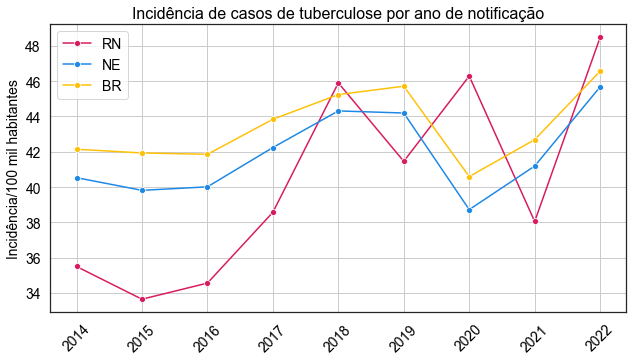

In [20]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
sns.lineplot(x=periodo, y=RN_incidencia, marker="o", label="RN", ax=ax, color="#D81B60")
sns.lineplot(x=periodo, y=NE_incidencia, marker="o", label="NE", ax=ax, color="#1E88E5")
sns.lineplot(x=periodo, y=BR_incidencia, marker="o", label="BR", ax=ax, color="#FFC107")

ax.set_ylabel('Incidência/100 mil habitantes', fontsize=14)
ax.set_xlabel(None)
ax.set_title("Incidência de casos de tuberculose por ano de notificação", fontsize=16)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)

plt.grid()
plt.xticks(ticks=periodo, labels=periodo, rotation = 45)
plt.savefig('graficos/figura 1 - incidencia.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Grupos sociais

### PPL

In [21]:
RN_ppl = pd.read_excel("base_dados/RN_TBConfAnoNotifPPL_RN.xlsx", index_col=0, na_values="-")
RN_ppl.loc[periodo,"Total"]

Ano Notificação
2014     22
2015     88
2016    100
2017    210
2018    329
2019    298
2020    454
2021    286
2022    392
Name: Total, dtype: int64

In [22]:
NE_ppl = pd.read_excel("base_dados/NE_TBConfAnoNotifPPL_NE.xlsx", index_col=0, na_values="-")
NE_ppl.loc[periodo,"Total"]

Ano Notificação
2014     463
2015    1471
2016    1691
2017    2092
2018    2403
2019    2723
2020    2411
2021    2285
2022    2556
Name: Total, dtype: int64

In [23]:
BR_ppl = pd.read_excel("base_dados/BR_TBConfAnoNotifPPL.xlsx", index_col=0, na_values="-")
BR_ppl.loc[periodo,"Total"]

Ano Notificação
2014     4071
2015     7568
2016     8431
2017    10314
2018    10863
2019    11761
2020    10467
2021     9912
2022    10272
Name: Total, dtype: int64

### AIDS

In [24]:
RN_AIDS = pd.read_excel("base_dados/RN_TBConfAnoNotifAIDS_RN.xlsx", index_col=0, na_values="-")
RN_AIDS.loc[periodo,"Total"]

Ano Notificação
2014    130
2015    122
2016     91
2017    140
2018    156
2019    156
2020    128
2021    138
2022    171
Name: Total, dtype: int64

In [25]:
NE_AIDS = pd.read_excel("base_dados/NE_TBConfAnoNotifAIDS_NE.xlsx", index_col=0, na_values="-")
NE_AIDS.loc[periodo,"Total"]

Ano Notificação
2014    1858
2015    1765
2016    1857
2017    1925
2018    2086
2019    2053
2020    1748
2021    1936
2022    2126
Name: Total, dtype: int64

In [26]:
BR_AIDS = pd.read_excel("base_dados/BR_TBConfAnoNotifAIDS.xlsx", index_col=0, na_values="-")
BR_AIDS.loc[periodo,"Total"]

Ano Notificação
2014    9273
2015    9050
2016    8804
2017    9042
2018    9089
2019    8863
2020    7736
2021    8212
2022    8900
Name: Total, dtype: int64

### Alcoolismo

In [27]:
RN_Alc = pd.read_excel("base_dados/RN_TBConfAnoNotifAlc_RN.xlsx", index_col=0, na_values="-")
RN_Alc.loc[periodo,"Total"]

Ano Notificação
2014    284
2015    305
2016    264
2017    304
2018    345
2019    341
2020    282
2021    285
2022    386
Name: Total, dtype: int64

In [28]:
BR_Alc = pd.read_excel("base_dados/BR_TBConfAnoNotifAlc.xlsx", index_col=0, na_values="-")
BR_Alc.loc[periodo,"Total"]

Ano Notificação
2014    13961
2015    14973
2016    15292
2017    16714
2018    17897
2019    18147
2020    16181
2021    17144
2022    19557
Name: Total, dtype: int64

In [29]:
NE_Alc = pd.read_excel("base_dados/NE_TBConfAnoNotifAlc_NE.xlsx", index_col=0, na_values="-")
NE_Alc.loc[periodo,"Total"]

Ano Notificação
2014    3988
2015    4322
2016    4289
2017    4775
2018    4988
2019    5149
2020    4404
2021    4650
2022    5464
Name: Total, dtype: int64

### Profissionais de Saúde

In [30]:
RN_ProfSau = pd.read_excel("base_dados/RN_TBConfAnoNotifProfSau_RN.xlsx", index_col=0, na_values="-")
RN_ProfSau.loc[periodo,"Total"]

Ano Notificação
2014     3
2015    11
2016    26
2017    10
2018    17
2019    23
2020    29
2021    19
2022    24
Name: Total, dtype: int64

In [31]:
BR_ProfSau = pd.read_excel("base_dados/BR_TBConfAnoNotifProfSau.xlsx", index_col=0, na_values="-")
BR_ProfSau.loc[periodo,"Total"]

Ano Notificação
2014     364
2015     932
2016    1074
2017    1069
2018    1232
2019    1154
2020    1330
2021    1196
2022    1276
Name: Total, dtype: int64

In [32]:
NE_ProfSau = pd.read_excel("base_dados/NE_TBConfAnoNotifProfSau_NE.xlsx", index_col=0, na_values="-")
NE_ProfSau.loc[periodo,"Total"]

Ano Notificação
2014     36
2015    214
2016    235
2017    238
2018    260
2019    272
2020    328
2021    303
2022    349
Name: Total, dtype: int64

### População em situação de rua

In [33]:
RN_PSR = pd.read_excel("base_dados/RN_TBConfAnoNotifPopSitRua_RN.xlsx", index_col=0, na_values="-")
RN_PSR.loc[periodo,"Total"]

Ano Notificação
2014     4
2015    42
2016    35
2017    46
2018    35
2019    44
2020    54
2021    41
2022    53
Name: Total, dtype: int64

In [34]:
BR_PSR = pd.read_excel("base_dados/BR_TBConfAnoNotifPopSitRua.xlsx", index_col=0, na_values="-")
BR_PSR.loc[periodo,"Total"]

Ano Notificação
2014    1511
2015    2920
2016    2952
2017    3176
2018    3402
2019    3630
2020    3476
2021    3518
2022    4289
Name: Total, dtype: int64

In [35]:
NE_PSR = pd.read_excel("base_dados/NE_TBConfAnoNotifPopSitRua_NE.xlsx", index_col=0, na_values="-")
NE_PSR.loc[periodo,"Total"]

Ano Notificação
2014    100
2015    444
2016    483
2017    591
2018    630
2019    696
2020    609
2021    658
2022    875
Name: Total, dtype: int64

### Tabagismo

In [36]:
RN_TBG = pd.read_excel("base_dados/RN_TBConfAnoNotifTabag_RN.xlsx", index_col=0, na_values="-")
RN_TBG.loc[periodo,"Total"]

Ano Notificação
2014     31
2015    264
2016    251
2017    318
2018    356
2019    350
2020    329
2021    324
2022    472
Name: Total, dtype: int64

In [37]:
BR_TBG = pd.read_excel("base_dados/BR_TBConfAnoNotifTabag.xlsx", index_col=0, na_values="-")
BR_TBG.loc[periodo,"Total"]

Ano Notificação
2014     5141
2015    15451
2016    18399
2017    20928
2018    23218
2019    23719
2020    20821
2021    22349
2022    25967
Name: Total, dtype: int64

In [38]:
NE_TBG = pd.read_excel("base_dados/NE_TBConfAnoNotifTabag_NE.xlsx", index_col=0, na_values="-")
NE_TBG.loc[periodo,"Total"]

Ano Notificação
2014     631
2015    3110
2016    4040
2017    4623
2018    5134
2019    5297
2020    4304
2021    4913
2022    6052
Name: Total, dtype: int64

### Diabetes

In [39]:
RN_DBT = pd.read_excel("base_dados/RN_TBConfAnoNotifDiab_RN.xlsx", index_col=0, na_values="-")
RN_DBT.loc[periodo,"Total"]

Ano Notificação
2014    106
2015     82
2016    108
2017    119
2018    117
2019    120
2020    122
2021    111
2022    156
Name: Total, dtype: int64

In [40]:
BR_DBT = pd.read_excel("base_dados/BR_TBConfAnoNotifDiab.xlsx", index_col=0, na_values="-")
BR_DBT.loc[periodo,"Total"]

Ano Notificação
2014    5559
2015    6008
2016    6216
2017    6669
2018    7202
2019    7639
2020    7351
2021    8346
2022    8750
Name: Total, dtype: int64

In [41]:
NE_DBT = pd.read_excel("base_dados/NE_TBConfAnoNotifDiab_NE.xlsx", index_col=0, na_values="-")
NE_DBT.loc[periodo,"Total"]

Ano Notificação
2014    1700
2015    1780
2016    1919
2017    2091
2018    2278
2019    2312
2020    2214
2021    2608
2022    2788
Name: Total, dtype: int64

## Total de casos no período 2014-2022

In [42]:
ano_inicio = 2014
ano_fim = 2022
PERIODO_ANALISE_PROPORCAO = range(ano_inicio, ano_fim + 1)

In [43]:
def total_casos(dados):
    total_casos_periodo = dados.loc[PERIODO_ANALISE_PROPORCAO, "Total"].sum()
    return total_casos_periodo

In [44]:
RN_Total_Casos = total_casos(RN_NotifTB)
RN_Total_Casos

12631

In [45]:
NE_Total_Casos = total_casos(NE_NotifTB)
NE_Total_Casos

213855

In [46]:
BR_Total_Casos = total_casos(BR_NotifTB)
BR_Total_Casos

814351

#### Proporção de casos por grupo social

A função abaixo é responsável por calcular a proporção de um grupo social em uma localidade. A proporção é calculada dividindo-se o total de casos do grupo social pelo total de casos de TB em uma localidade.

In [47]:
def proporcao(grupo_regiao, total_casos_regiao):
    total_grupo = grupo_regiao.loc[PERIODO_ANALISE_PROPORCAO, "Total"].sum()
    proporcao = total_grupo/total_casos_regiao
    return round(proporcao * 100, 2)

A função abaixo recebe as proporções de um grupo social nas três localidades e retorna tabela contendo as três proporções.

In [48]:
def criar_tabela_proporcao(proporcao_grupo_rn, proporcao_grupo_ne, proporcao_grupo_br):
    return pd.DataFrame({
            "proporcao":[proporcao_grupo_rn, proporcao_grupo_ne, proporcao_grupo_br],
            "regiao":["RN", "NE", "BR"]})

##### PPL

In [49]:
proporcao_ppl_rn = proporcao(RN_ppl, RN_Total_Casos)

In [50]:
proporcao_ppl_br = proporcao(BR_ppl, BR_Total_Casos)

In [51]:
proporcao_ppl_ne = proporcao(NE_ppl, NE_Total_Casos)

In [52]:
proporcao_ppl = criar_tabela_proporcao(proporcao_ppl_rn, proporcao_ppl_ne, proporcao_ppl_br)
proporcao_ppl

,proporcao,regiao
0,17.25,RN
1,8.46,NE
2,10.27,BR


##### AIDS

In [53]:
proporcao_AIDS_rn = proporcao(RN_AIDS, RN_Total_Casos)

In [54]:
proporcao_AIDS_br = proporcao(BR_AIDS, BR_Total_Casos)

In [55]:
proporcao_AIDS_ne = proporcao(NE_AIDS, NE_Total_Casos)

In [56]:
proporcao_aids = criar_tabela_proporcao(proporcao_AIDS_rn, proporcao_AIDS_ne, proporcao_AIDS_br)
proporcao_aids

,proporcao,regiao
0,9.75,RN
1,8.11,NE
2,9.70,BR


##### Alcoolismo

In [57]:
proporcao_alc_rn = proporcao(RN_Alc, RN_Total_Casos)

In [58]:
proporcao_alc_br = proporcao(BR_Alc, BR_Total_Casos)

In [59]:
proporcao_alc_ne = proporcao(NE_Alc, NE_Total_Casos)

In [60]:
proporcao_alc = criar_tabela_proporcao(proporcao_alc_rn, proporcao_alc_ne, proporcao_alc_br)
proporcao_alc

,proporcao,regiao
0,22.14,RN
1,19.65,NE
2,18.40,BR


##### Profissionais de saúde

In [61]:
proporcao_ProfSau_rn = proporcao(RN_ProfSau, RN_Total_Casos)

In [62]:
proporcao_ProfSau_br = proporcao(BR_ProfSau, BR_Total_Casos)

In [63]:
proporcao_ProfSau_ne = proporcao(NE_ProfSau, NE_Total_Casos)

In [64]:
proporcao_prof_sau = criar_tabela_proporcao(proporcao_ProfSau_rn, proporcao_ProfSau_ne, proporcao_ProfSau_br)
proporcao_prof_sau

,proporcao,regiao
0,1.28,RN
1,1.05,NE
2,1.18,BR


##### População em situação de rua

In [65]:
proporcao_PSR_rn = proporcao(RN_PSR, RN_Total_Casos)

In [66]:
proporcao_PSR_br = proporcao(BR_PSR, BR_Total_Casos)

In [67]:
proporcao_PSR_ne = proporcao(NE_PSR, NE_Total_Casos)

In [68]:
proporcao_PSR = criar_tabela_proporcao(proporcao_PSR_rn, proporcao_PSR_ne, proporcao_PSR_br)
proporcao_PSR

,proporcao,regiao
0,2.80,RN
1,2.38,NE
2,3.55,BR


##### Tabagismo

In [69]:
proporcao_tgb_rn = proporcao(RN_TBG, RN_Total_Casos)

In [70]:
proporcao_tgb_br = proporcao(BR_TBG, BR_Total_Casos)

In [71]:
proporcao_tgb_ne = proporcao(NE_TBG, NE_Total_Casos)

In [72]:
proporcao_tgb = criar_tabela_proporcao(proporcao_tgb_rn, proporcao_tgb_ne, proporcao_tgb_br)
proporcao_tgb

,proporcao,regiao
0,21.34,RN
1,17.82,NE
2,21.61,BR


##### Diabetes

In [73]:
proporcao_dbt_rn = proporcao(RN_DBT, RN_Total_Casos)

In [74]:
proporcao_dbt_br = proporcao(BR_DBT, BR_Total_Casos)

In [75]:
proporcao_dbt_ne = proporcao(NE_DBT, NE_Total_Casos)

In [76]:
proporcao_dbt = criar_tabela_proporcao(proporcao_dbt_rn, proporcao_dbt_ne, proporcao_dbt_br)
proporcao_dbt

,proporcao,regiao
0,8.24,RN
1,9.21,NE
2,7.83,BR


#### Gráfico da proporção de casos por grupo social

In [77]:
grupos_sociais = [("PPL",proporcao_ppl), ("AIDS",proporcao_aids), ("Alcoolismo",proporcao_alc), 
                  ("Profissionais de Saúde",proporcao_prof_sau), ("Pop. em Sit. de Rua",proporcao_PSR), 
                  ("Tabagismo",proporcao_tgb), ("Diabetes",proporcao_dbt)]

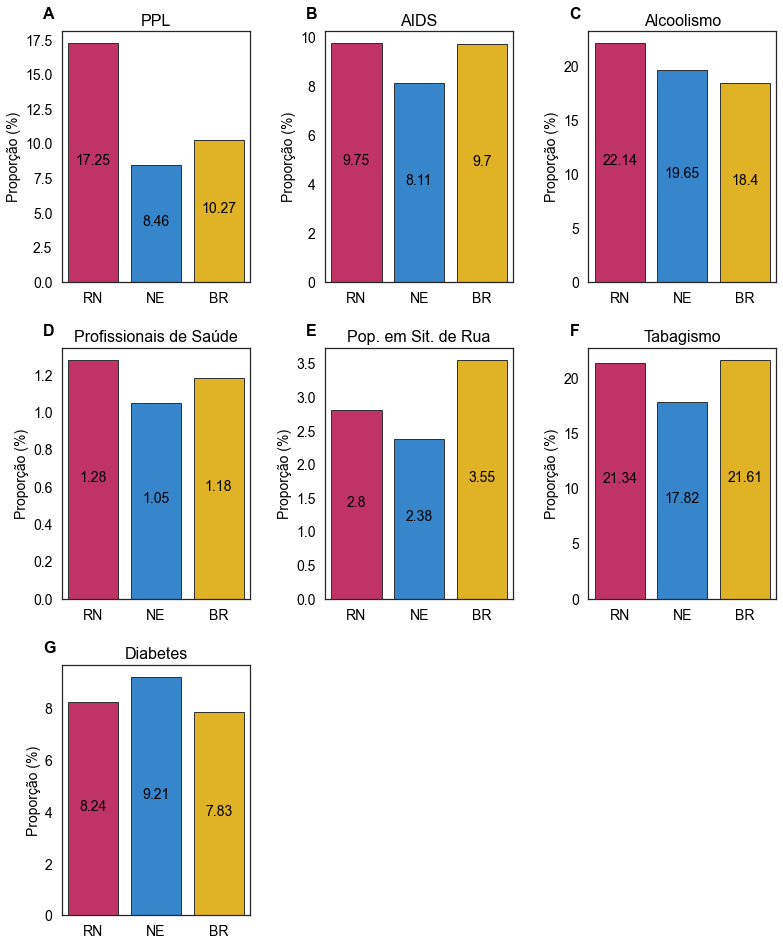

In [78]:
posicao = 0
linhas = 3
colunas = 3
posicoes = [*itertools.product(range(0, linhas), range(0, colunas))]

# A4 canvas
fig_width_cm = 21                                # A4 page
fig_height_cm = 29.7
inches_per_cm = 1 / 2.54                         # Convert cm to inches
fig_width = fig_width_cm * inches_per_cm         # width in inches
fig_height = fig_height_cm * inches_per_cm       # height in inches
fig_size = [fig_width * 1.5, fig_height * 1.5]

plt.rc('text', usetex=False) # so that LaTeX is not needed when creating a PDF with PdfPages later on
fig, axs = plt.subplots(linhas, colunas, figsize=fig_size)

for nome, grupo in grupos_sociais:
    posicao_grafico = posicoes[posicao]
    ax = sns.barplot(ax=axs[posicao_grafico], data=grupo, y="proporcao", x="regiao", 
                     linewidth=1, edgecolor=".2", palette=["#D81B60", "#1E88E5", "#FFC107"])
    ax.set_box_aspect(4/len(ax.patches))

    ax.text(-0.1, 1.05, string.ascii_uppercase[posicao], transform=ax.transAxes, 
            size=16, weight='bold')

    ax.bar_label(ax.containers[0], label_type='center', size=14, padding=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f"{nome}", fontsize=16)
    ax.set_ylabel('Proporção (%)', fontsize=14)
    ax.set_xlabel(None)
    posicao += 1

for delete in range(posicao, linhas * colunas):
    fig.delaxes(ax=axs[posicoes[delete]])

plt.subplots_adjust(left=0.1,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, # Horizontal 
                    hspace=0.01) # Vertical
                    
plt.savefig('graficos/figura 2 - proporcao_grupos_sociais.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Desfecho

In [79]:
desfecho_ppl = pd.read_excel("base_dados/PPL_desfecho.xlsx", index_col=0, na_values="-")
desfecho_alc = pd.read_excel("base_dados/Alc_desfecho.xlsx", index_col=0, na_values="-")
desfecho_aids = pd.read_excel("base_dados/AIDS_desfecho.xlsx", index_col=0, na_values="-")
desfecho_tbg = pd.read_excel("base_dados/TBG_desfecho.xlsx", index_col=0, na_values="-")
desfecho_dbt = pd.read_excel("base_dados/DBT_desfecho.xlsx", index_col=0, na_values="-")
desfecho_prof_sau = pd.read_excel("base_dados/ProfSaude_desfecho.xlsx", index_col=0, na_values="-")
desfecho_psr = pd.read_excel("base_dados/PSR_desfecho.xlsx", index_col=0, na_values="-")

In [80]:
desfecho_prof_sau.loc[periodo, :]

,Ign/Branco,Cura,Abandono,Óbito por tuberculose,Óbito por outras causas,Transferência,TB-DR,Mudança de Esquema,Total
Ano Notificação,,,,,,,,,
2014,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3
2015,NaN,7.0,1.0,NaN,NaN,2.0,1.0,NaN,11
2016,NaN,21.0,1.0,NaN,1.0,2.0,1.0,NaN,26
2017,NaN,9.0,NaN,1.0,NaN,NaN,NaN,NaN,10
2018,NaN,13.0,1.0,NaN,1.0,2.0,NaN,NaN,17
2019,NaN,21.0,1.0,1.0,NaN,NaN,NaN,NaN,23
2020,1.0,23.0,3.0,NaN,NaN,1.0,NaN,1.0,29
2021,3.0,14.0,1.0,NaN,NaN,NaN,NaN,1.0,19
2022,12.0,6.0,2.0,NaN,1.0,2.0,1.0,NaN,24


In [81]:
def desfecho(dados):
    total_por_tipo_desfecho = dados.loc[periodo].sum()
    total_registros = total_por_tipo_desfecho["Total"]
    total_por_tipo_desfecho.drop("Total", inplace=True)
    return total_por_tipo_desfecho/total_registros
desfecho(desfecho_aids)

Ign/Branco                 0.051136
Cura                       0.310877
Abandono                   0.094156
Óbito por tuberculose      0.116071
Óbito por outras causas    0.094968
Transferência              0.273539
TB-DR                      0.008929
Mudança de Esquema         0.039773
Abandono Primário          0.010552
dtype: float64

In [82]:
desfecho_todos_grupos = pd.DataFrame({
    "AIDS":desfecho(desfecho_aids),
    "ALC":desfecho(desfecho_alc),
    "DBT":desfecho(desfecho_dbt),
    "PPL":desfecho(desfecho_ppl),
    "ProfSau":desfecho(desfecho_prof_sau),
    "PSR":desfecho(desfecho_psr),
    "TBG":desfecho(desfecho_tbg)
})

In [83]:
def heatmap(matriz, rotulo_x):
  labels = (matriz.round(4) * 100).astype("category")
  plt.figure(figsize=(10, 8))
  ax = sns.heatmap(matriz, cmap='crest', robust=True, annot=labels, fmt=".2g", annot_kws={'size':14, 'color':'black'},
                  linecolor ='black', linewidths = 0.5, cbar=True, square=False, mask=(matriz==0))
  for t in ax.texts: t.set_text(t.get_text() + "%")
  cbar = ax.collections[0].colorbar
  cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
  # cbar.set_ticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
  cbar.ax.tick_params(axis='y', which='major', length=0, pad=15, labelsize=14)

  ax.set_xlabel(f"{rotulo_x}", fontsize=16, labelpad=20)
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
  ax.tick_params(axis='both', which='major', labelsize=14)

  plt.savefig("graficos/figura 3 - formas_desfecho.jpg", dpi=300, bbox_inches = "tight")
  plt.show()

In [84]:
novos_nomes = {
    'Ign/Branco':'Ign/Branco', 'Cura':'Cura', 'Abandono':'Abandono', 'Óbito por tuberculose':'Óbito por\ntuberculose',
    'Óbito por outras causas': 'Óbito por\noutras causas', 'Transferência': 'Transferência', 'TB-DR': 'TB-DR',
    'Mudança de Esquema': 'Mudança\nde\nEsquema', 'Abandono Primário': 'Abandono\nPrimário'}
desfecho_todos_grupos.rename(index=novos_nomes, inplace=True)

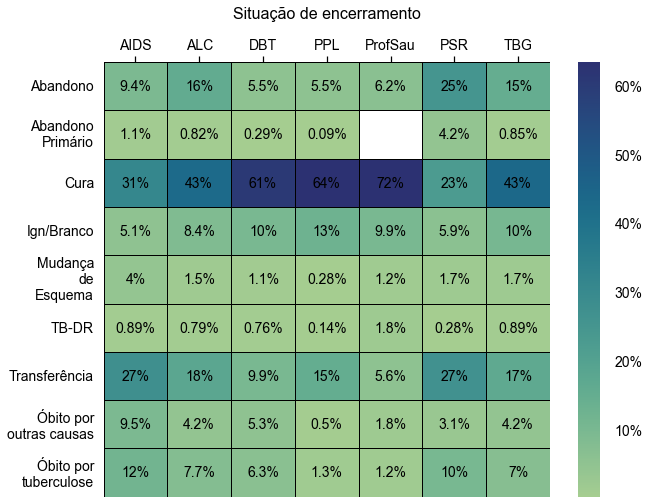

['Abandono',
 'Abandono\nPrimário',
 'Cura',
 'Ign/Branco',
 'Mudança de\nEsquema',
 'TB-DR',
 'Transferência',
 'Óbito por\noutras causas',
 'Óbito por TB']

In [85]:
heatmap(desfecho_todos_grupos, "Situação de encerramento")
['Abandono', 'Abandono\nPrimário', 'Cura', 'Ign/Branco', 'Mudança de\nEsquema',
 'TB-DR', 'Transferência', 'Óbito por\noutras causas', 'Óbito por TB']

# Forma

In [86]:
forma = pd.read_excel("forma.xlsx", index_col=0)

forma_pulmonar = (forma['PULMONAR'] / forma['Total']).round(4) * 100
forma_extrapulmonar = (forma['EXTRAPULMONAR'] / forma['Total']).round(4) * 100
forma_pulmonar_extrapulmonar = (forma['PULMONAR + EXTRAPULMONAR'] / forma['Total']).round(4) * 100

formas_proporcao = pd.DataFrame({"Pulmonar":forma_pulmonar, "Extrapulmonar":forma_extrapulmonar, "Pulmonar/\nextrapulmonar":forma_pulmonar_extrapulmonar})

In [87]:
formas_proporcao

,Pulmonar,Extrapulmonar,Pulmonar/\nextrapulmonar
Grupo,,,
PSR,90.68,4.52,4.80
PPL,97.57,1.51,0.92
ProfSau,66.67,28.40,4.94
AIDS,65.44,22.90,11.65
Alc,88.04,6.46,5.49
DBT,89.40,7.80,2.79
TBG,90.83,5.35,3.82


# TDO

In [88]:
tdo = pd.read_excel("tdo.xlsx", index_col=0)

tdo_branco = (tdo['Ign/Branco'] / tdo['Total']).round(4) * 100
tdo_sim = (tdo['Sim'] / tdo['Total']).round(4) * 100
tdo_nao = (tdo['Não'] / tdo['Total']).round(4) * 100

tdo_proporcao = pd.DataFrame({"Ign/Branco'":tdo_branco, "Sim":tdo_sim, "Não":tdo_nao})
tdo_proporcao

,Ign/Branco',Sim,Não
Grupo,,,
PSR,51.41,34.18,14.41
PPL,29.33,62.28,8.40
ProfSau,38.89,32.72,28.40
AIDS,40.10,39.77,20.13
Alc,42.55,35.80,21.65
DBT,40.17,32.76,27.07
TBG,42.76,36.86,20.38


# Gráfico TDO e Forma clínica da TB

In [89]:
def plot_forma_tb(grupos, axs, posicao, fig):
    sns.set(style='white')
    ax = axs[posicao]
    grupos.plot(kind="bar", stacked=True, width=0.8, ax=ax)
    ax.set_title(f"Forma da tuberculose por grupo social (RN)", fontsize=16)
    ax.tick_params(labelsize=14)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fontsize=14, ncol=3)
    for bars in ax.containers:
        labels = [f'{x:g}%' if x > 1.5 else "" for x in bars.datavalues]
        ax.bar_label(bars, labels=labels, label_type='center', size=14, padding=2,)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.set_ylabel("Formas da tuberculose (%)", size=14)
    ax.set_xlabel("")
    sns.despine()
    ax.text(-0.05, 1.02, string.ascii_uppercase[posicao], transform=ax.transAxes,
        size=16, weight='bold')


def plot_tdo(tdo_proporcao, axs, posicao, fig):

    sns.set(style='white')
    ax = axs[posicao]
    tdo_proporcao.plot(kind="bar", stacked=True, width=0.8, ax=ax)
    ax.set_title(f"TDO para Tuberculose", fontsize=16)
    ax.tick_params(labelsize=14)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fontsize=14, ncol=3)
    for bars in ax.containers:
        labels = [f'{x:g}%' if x > 1.5 else "" for x in bars.datavalues]
        ax.bar_label(bars, labels=labels, label_type='center', size=14, padding=2,)

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.set_ylabel("Realização de TDO (%)", size=14)
    ax.set_xlabel("")
    sns.despine()
    ax.text(-0.05, 1.05, string.ascii_uppercase[posicao], transform=ax.transAxes,
            size=16, weight='bold')

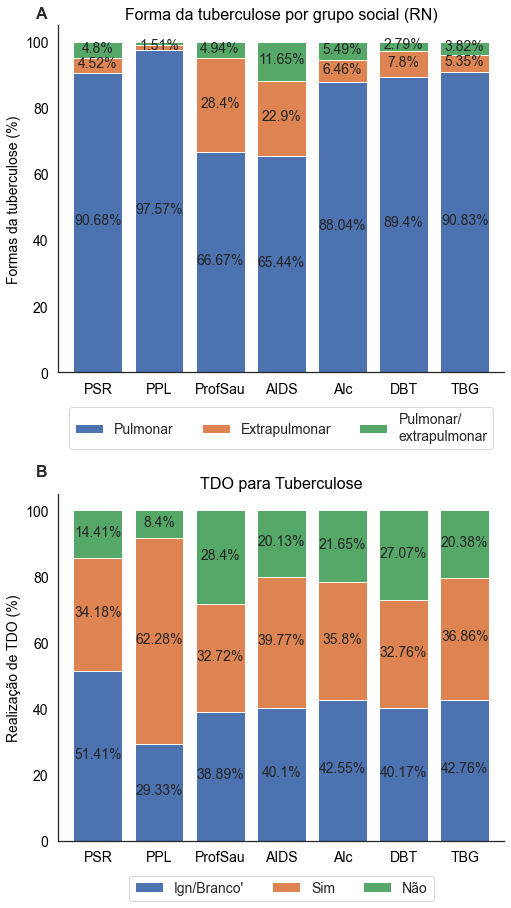

In [90]:
linhas = 2
colunas = 1
fig, axs = plt.subplots(linhas, colunas, figsize=(8,15), sharex=False)

posicao = 0
plot_forma_tb(formas_proporcao, axs, posicao, fig)

posicao += 1
plot_tdo(tdo_proporcao, axs, posicao, fig)

plt.subplots_adjust(hspace=0.35) # Vertical

plt.savefig('graficos/figura 4 - forma_tdo.jpg', dpi=300, bbox_inches='tight')
plt.show()

# PPL

## Importante!!!
**"Os gestores das unidades prisionais dos estados brasileiros alimentam o sistema periodicamente com informações que retratam a realidade carcerária local. Os dados são coletados durante ciclos de 6 meses."**

Os dados com valor zero estão em branco (not a number). É possível que a ausência de valores seja por não preenchiementos dos gestores da unidades prisionais.

In [91]:
dados = pd.read_excel("base_dados/2022 dados-sisdepen-jan-jun-2022-12ciclo.xlsx")

## Tratamento de dados

As colunas abaixo selecionadas contém informações sobre celas de enfermaria com solário e sobre solários para pacientes, que são as variáveis de interesse nesta análise.

In [92]:
colunas = [
    'Nome do Estabelecimento', 'Âmbito', 'UF', '1.2 Tipo de estabelecimento - originalmente destinado',
    '2.4 Módulo de saúde | Cela de enfermaria com solário',
    '2.4 Módulo de saúde | Cela de enfermaria com solário | Quantidade',
    '2.4 Módulo de saúde | Solário para pacientes',
    '2.4 Módulo de saúde | Solário para pacientes | Quantidade',
    '4.1 População prisional | Total',
    '4.1 População prisional | Presos sentenciados - regime fechado | Total']
# ppl_2022_1 = ppl_2022_1.loc[:, colunas]
# ppl_2022_1

ppl_2022 = dados.loc[:, colunas]

Apenas estabelecimentos de âmbito estadual foram avaliados

In [93]:
ppl_2022.query("Âmbito == 'Estadual'", inplace=True)

In [94]:
ppl_2022.replace({"NÃ£o":"Não"}, inplace=True)

In [95]:
novos_nomes = {
    'Âmbito':"Âmbito", 'UF':"UF",
    '2.4 Módulo de saúde | Cela de enfermaria com solário':"Cela de enfermaria com solário",
    '2.4 Módulo de saúde | Cela de enfermaria com solário | Quantidade':"Cela de enfermaria com solário | Quantidade",
    '2.4 Módulo de saúde | Solário para pacientes':"Solário para pacientes",
    '2.4 Módulo de saúde | Solário para pacientes | Quantidade':"Solário para pacientes | Quantidade"}
ppl_2022.rename(columns=novos_nomes, inplace=True)

In [96]:
ppl_2022.fillna(0, inplace=True)

### Prisão domiciliar e uso de tornozeleira eletrônica

Os comandos abaixo foram usados para remvove os registros de pessoas em situação de prisão domiciar ou monitoramento eletrônico

In [97]:
ppl_2022[ppl_2022['1.2 Tipo de estabelecimento - originalmente destinado'].str.lower().str.contains("domiciliar|monito")]['1.2 Tipo de estabelecimento - originalmente destinado'].unique()

array(['Outro : Centro de Monitoramento EletrÃ´nico de Presos - CMEP',
       'Outro : Central de Monitoramento EletrÃ´nico',
       'Outro : Estabelecimento destinaÃ§Ã£o ao monitoramento eletrÃ´nico',
       'Outro : Central de MonitoraÃ§Ã£o EletrÃ´nica de Pessoas - Monitoramento EletrÃ´nico Domiciliar',
       'Outro : MONITORAÃ‡ÃƒO ELETRÃ”NICA DE PESSOAS SUBMETIDAS EM EXECUÃ‡ÃƒO DE PENA OU SUBMETIDA A MEDIDAS CAUTELARES',
       'Outro : MONITORAMENTO ELETRÃ”NICO',
       'Outro : GerÃªncia de FiscalizaÃ§Ã£o de Custodiados - Estabelecimento destinado Ã\xa0 fiscalizaÃ§Ã£o do recolhimento domiciliar do regime aberto do DF.',
       'Outro : Estabelecimento destinado ao cumprimento de pena e medida cautela sob as condiÃ§Ãµes do uso de monitoraÃ§Ã£o eletrÃ´nica',
       'Outro : Monitoramento EletrÃ´nico - Domiciliar',
       'Outro : MONITORIÃ‡ÃƒO ELETRÃ”NICA',
       'Outro : MONITORAMENTO ELETRÃ”NICO DE PESSOAS',
       'Outro : Monitoramento eletrÃ´nico, com uso de tornozeleira elet

In [98]:
ppl_2022 = ppl_2022[~ppl_2022['1.2 Tipo de estabelecimento - originalmente destinado'].str.lower().str.contains("domiciliar|monito")]
ppl_2022 = ppl_2022[~ppl_2022['Nome do Estabelecimento'].str.lower().str.contains("domiciliar")]
## O comando abaixo mostra os tipos de estabelecimento usados para a análise de dados 
ppl_2022['1.2 Tipo de estabelecimento - originalmente destinado'].unique()

array(['Estabelecimento destinado ao recolhimento de presos provisÃ³rios',
       'Estabelecimento destinado a diversos tipos de regime',
       'Estabelecimento destinado ao cumprimento de pena em regime fechado',
       'Estabelecimento destinado ao cumprimento de pena em regime semiaberto',
       'Estabelecimento destinado ao cumprimento de medida de seguranÃ§a de internaÃ§Ã£o ou tratamento ambulatorial',
       'Patronato',
       'Estabelecimento destinado ao cumprimento de pena em regime aberto ou de limitaÃ§Ã£o de fim de semana',
       'Outro : Estabelecimento destinado ao atendimento mÃ©dico hospitalar com internamento se necessÃ¡rio a pacientes de ambos os sexos.',
       'Outro : Estabelecimento destinado a inclusÃ£o prisional - Porta de entrada',
       'Outro : Conjunto Penal',
       'Estabelecimento destinado Ã\xa0 realizaÃ§Ã£o de exames gerais e criminolÃ³gico',
       'Outro : Acopla todos os tipos de regime',
       'Outro : Unidade Prisional Regional Feminia,  Recol

## Análise da presença de solários

In [99]:
def analise_solario_pacientes(dados, estado=""):
    if estado:
        dados = dados.query("UF == @estado").copy()
    solario_pacientes = dados.loc[:, ["Solário para pacientes", "Solário para pacientes | Quantidade"]]

    contagem = solario_pacientes["Solário para pacientes"].value_counts().to_frame().T
    contagem.rename(index={"Solário para pacientes":estado}, inplace=True)

    total = solario_pacientes.query(
        "`Solário para pacientes` == 'Sim'")['Solário para pacientes | Quantidade'].sum()
    contagem['total'] = total

    return contagem

In [100]:
def analise_enfermaria_solario(dados, estado=""):
    if estado:
        dados = dados.query("UF == @estado").copy()
    enfermaria_com_solario = dados.loc[:, ['Cela de enfermaria com solário','Cela de enfermaria com solário | Quantidade']]

    contagem = enfermaria_com_solario["Cela de enfermaria com solário"].value_counts().to_frame().T
    contagem.rename(index={"Cela de enfermaria com solário":estado}, inplace=True)

    total = enfermaria_com_solario.query(
        "`Cela de enfermaria com solário` == 'Sim'")['Cela de enfermaria com solário | Quantidade'].sum()
    contagem['total'] = total

    return contagem

Analise de solário por estados da região nordeste. Como não é possível filtrar os dados do sisdepen por região, filtrei os dados de cada um dos estados da região. Mais adiante esses dados serão concatenados para obter os valores do nordeste. 

In [101]:
solario_pacientes_al = analise_solario_pacientes(ppl_2022, 'AL')
solario_pacientes_ba = analise_solario_pacientes(ppl_2022, 'BA')
solario_pacientes_ce = analise_solario_pacientes(ppl_2022, 'CE')
solario_pacientes_ma = analise_solario_pacientes(ppl_2022, 'MA')
solario_pacientes_pe = analise_solario_pacientes(ppl_2022, 'PE')
solario_pacientes_pi = analise_solario_pacientes(ppl_2022, 'PI')
solario_pacientes_pb = analise_solario_pacientes(ppl_2022, 'PB')
solario_pacientes_rn = analise_solario_pacientes(ppl_2022, 'RN')
solario_pacientes_se = analise_solario_pacientes(ppl_2022, 'SE')

estados_solario_pacientes = pd.concat(
    [solario_pacientes_al, solario_pacientes_ba, solario_pacientes_ce,
     solario_pacientes_ma, solario_pacientes_pe, solario_pacientes_pi,
     solario_pacientes_pb, solario_pacientes_rn, solario_pacientes_se])

In [102]:
estados_enfermaria_al = analise_enfermaria_solario(ppl_2022, 'AL')
estados_enfermaria_ba = analise_enfermaria_solario(ppl_2022, 'BA')
estados_enfermaria_ce = analise_enfermaria_solario(ppl_2022, 'CE')
estados_enfermaria_ma = analise_enfermaria_solario(ppl_2022, 'MA')
estados_enfermaria_pe = analise_enfermaria_solario(ppl_2022, 'PE')
estados_enfermaria_pi = analise_enfermaria_solario(ppl_2022, 'PI')
estados_enfermaria_pb = analise_enfermaria_solario(ppl_2022, 'PB')
estados_enfermaria_rn = analise_enfermaria_solario(ppl_2022, 'RN')
estados_enfermaria_se = analise_enfermaria_solario(ppl_2022, 'SE')

estados_enfermaria_solario = pd.concat(
    [estados_enfermaria_al, estados_enfermaria_ba, estados_enfermaria_ce, estados_enfermaria_ma,
     estados_enfermaria_pe, estados_enfermaria_pi, estados_enfermaria_pb, estados_enfermaria_rn,
     estados_enfermaria_se])

In [103]:
solario_pacientes_br = analise_solario_pacientes(ppl_2022)
solario_enfermaria_br = analise_enfermaria_solario(ppl_2022)

### Solários no RN

In [104]:
solario_pacientes_rn['Proporcao (%)'] = (solario_pacientes_rn["Sim"] / solario_pacientes_rn[["Não", "Sim"]].sum(axis=1)).round(4) * 100
solario_pacientes_rn['Proporcao Não (%)'] = (solario_pacientes_rn["Não"] / solario_pacientes_rn[["Não", "Sim"]].sum(axis=1)).round(4) * 100

In [105]:
try: 
    estados_enfermaria_rn['Proporcao (%)'] = (estados_enfermaria_rn["Sim"] / estados_enfermaria_rn[["Não", "Sim"]].sum(axis=1)).round(4) * 100
    estados_enfermaria_rn['Proporcao Não (%)'] = (estados_enfermaria_rn["Não"] / estados_enfermaria_rn[["Não", "Sim"]].sum(axis=1)).round(4) * 100  
except:
    estados_enfermaria_rn['Proporcao Não (%)'] = 100

### Solários no BR

In [106]:
solario_pacientes_br['Proporcao (%)'] = (solario_pacientes_br["Sim"] / solario_pacientes_br[["Não", "Sim"]].sum(axis=1)).round(4) * 100
solario_pacientes_br['Proporcao Não (%)'] = (solario_pacientes_br["Não"] / solario_pacientes_br[["Não", "Sim"]].sum(axis=1)).round(4) * 100

solario_enfermaria_br['Proporcao (%)'] = (solario_enfermaria_br["Sim"] / solario_enfermaria_br[["Não", "Sim"]].sum(axis=1)).round(4) * 100
solario_enfermaria_br['Proporcao Não (%)'] = (solario_enfermaria_br["Não"] / solario_enfermaria_br[["Não", "Sim"]].sum(axis=1)).round(4) * 100

In [107]:
solario_pacientes_br.rename(index={"":"BR"}, inplace=True)
solario_enfermaria_br.rename(index={"":"BR"}, inplace=True)

### Solários no NE

In [108]:
solario_pacientes_ne = estados_solario_pacientes.sum().to_frame(name="NE").T
solario_pacientes_ne['Proporcao (%)'] = (solario_pacientes_ne["Sim"] / solario_pacientes_ne[["Não", "Sim"]].sum(axis=1)).round(4) * 100
solario_pacientes_ne['Proporcao Não (%)'] = (solario_pacientes_ne["Não"] / solario_pacientes_ne[["Não", "Sim"]].sum(axis=1)).round(4) * 100

In [109]:
enfermaria_solario_ne = estados_enfermaria_solario.sum().to_frame(name="NE").T
enfermaria_solario_ne['Proporcao (%)'] = (enfermaria_solario_ne["Sim"] / enfermaria_solario_ne[["Não", "Sim"]].sum(axis=1)).round(4) * 100
enfermaria_solario_ne['Proporcao Não (%)'] = (enfermaria_solario_ne["Não"] / enfermaria_solario_ne[["Não", "Sim"]].sum(axis=1)).round(4) * 100

## Solários - tabela final

In [110]:
colunas = ['Sim', 'Proporcao (%)', 'Não', 'Proporcao Não (%)']
estados_solario_pacientes_final = pd.concat([solario_pacientes_rn, solario_pacientes_ne, solario_pacientes_br]).loc[:, colunas]
estados_solario_pacientes_final

,Sim,Proporcao (%),Não,Proporcao Não (%)
RN,4.0,22.22,14.0,77.78
NE,106.0,36.05,188.0,63.95
BR,533.0,38.32,858.0,61.68


In [111]:
estados_solario_pacientes_final.to_excel('graficos/solario_pacientes.xlsx')

In [112]:
estados_enfermaria_solario_final = pd.concat([estados_enfermaria_rn, enfermaria_solario_ne, solario_enfermaria_br]).loc[:, colunas]
estados_enfermaria_solario_final

,Sim,Proporcao (%),Não,Proporcao Não (%)
RN,1.0,5.56,17.0,94.44
NE,81.0,27.55,213.0,72.45
BR,305.0,21.93,1086.0,78.07


In [113]:
estados_enfermaria_solario_final.to_excel('graficos/enfermaria_solario.xlsx')